Based on your dataset and column types, here’s a **brief description of each column** and what it likely represents in your supply chain warehouse dataset:

---

### 📄 **Column Descriptions**

| Column Name                    | Description                                            |
| ------------------------------ | ------------------------------------------------------ |
| `Unnamed: 0`                   | Index column (can be dropped)                          |
| `Location_type`                | Type of warehouse location: Urban, Rural, etc.         |
| `WH_capacity_size`             | Warehouse size: Small, Mid, Large                      |
| `zone`                         | Broad geographic zone (e.g., North, South)             |
| `WH_regional_zone`             | Sub-regional identifier (e.g., Zone 1, Zone 2)         |
| `num_refill_req_l3m`           | Number of refill requests in the last 3 months         |
| `transport_issue_l1y`          | Transport issues in the last 1 year (count)            |
| `Competitor_in_mkt`            | Number of competitors in the same market               |
| `retail_shop_num`              | Number of retail shops served by the warehouse         |
| `wh_owner_type`                | Ownership type: Company Owned, Rented, etc.            |
| `distributor_num`              | Number of distributors linked to the warehouse         |
| `flood_impacted`               | Whether the warehouse was flood-impacted (0/1)         |
| `flood_proof`                  | Whether the warehouse is flood-proof (0/1)             |
| `electric_supply`              | Availability of electricity (0/1)                      |
| `dist_from_hub`                | Distance from central distribution hub (numeric)       |
| `workers_num`                  | Number of employees/workers at the warehouse           |
| `storage_issue_reported_l3m`   | Count of storage issues in last 3 months               |
| `temp_reg_mach`                | Whether temperature control machines are present (0/1) |
| `approved_wh_govt_certificate` | Govt approval certificate grade (A, B, C, etc.)        |
| `wh_breakdown_l3m`             | Warehouse equipment breakdowns in last 3 months        |
| `govt_check_l3m`               | Number of government inspections in last 3 months      |
| `product_wg_ton`               | ✅ Target variable — product weight handled in tons     |

---

Let me know if you want me to:

* Encode these features
* Remove any
* Proceed to modeling with `product_wg_ton` as the prediction target


In [5]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install scikit-learn
import pandas as pd         # For data handling
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt   # For plots
import seaborn as sns       # For advanced visualizations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Note: you may need to restart the kernel to use updated packages.


In [8]:
data = pd.read_csv("data.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    25000 non-null  int64  
 1   Location_type                 25000 non-null  object 
 2   WH_capacity_size              25000 non-null  object 
 3   zone                          25000 non-null  object 
 4   WH_regional_zone              25000 non-null  object 
 5   num_refill_req_l3m            25000 non-null  int64  
 6   transport_issue_l1y           25000 non-null  int64  
 7   Competitor_in_mkt             25000 non-null  int64  
 8   retail_shop_num               25000 non-null  int64  
 9   wh_owner_type                 25000 non-null  object 
 10  distributor_num               25000 non-null  int64  
 11  flood_impacted                25000 non-null  int64  
 12  flood_proof                   25000 non-null  int64  
 13  e

In [11]:
print(data['Location_type'].value_counts())

Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64


/var/folders/8x/_c65xsx17j92zw8g43npqhyw0000gn/T/ipykernel_32205/1841993860.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Location_type'], palette='Set2')


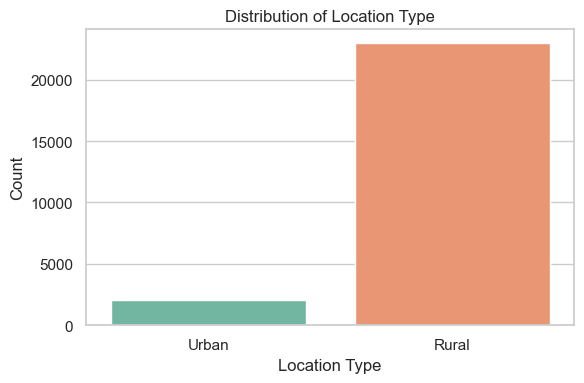

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot from Series directly
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Location_type'], palette='Set2')

plt.title("Distribution of Location Type")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [13]:
print(data['WH_capacity_size'].value_counts())


WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64


/var/folders/8x/_c65xsx17j92zw8g43npqhyw0000gn/T/ipykernel_32205/3568925444.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['WH_capacity_size'], palette='pastel')


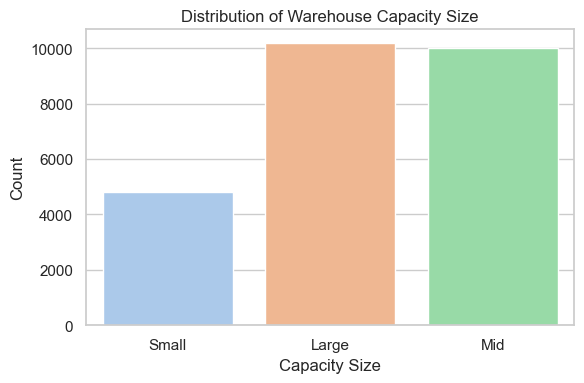

In [15]:
# Set style
sns.set(style="whitegrid")

# Plot from Series directly
plt.figure(figsize=(6, 4))
sns.countplot(x=data['WH_capacity_size'], palette='pastel')

plt.title("Distribution of Warehouse Capacity Size")
plt.xlabel("Capacity Size")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [16]:


print(data['zone'].value_counts())

zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64


/var/folders/8x/_c65xsx17j92zw8g43npqhyw0000gn/T/ipykernel_32205/10261506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['zone'], palette='pastel')


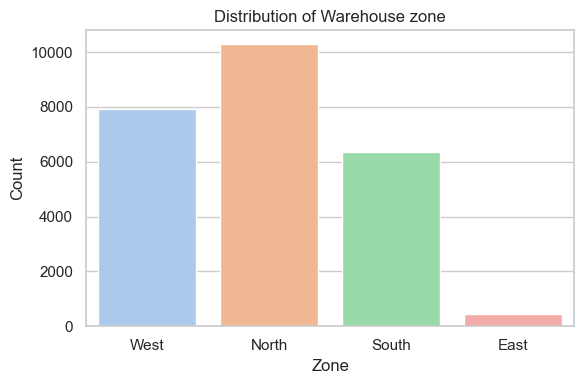

In [17]:
# Set style
sns.set(style="whitegrid")

# Plot from Series directly
plt.figure(figsize=(6, 4))
sns.countplot(x=data['zone'], palette='pastel')

plt.title("Distribution of Warehouse zone")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [19]:
print(data['WH_regional_zone'].value_counts())

WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64


/var/folders/8x/_c65xsx17j92zw8g43npqhyw0000gn/T/ipykernel_32205/1297730781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['WH_regional_zone'], palette='pastel')


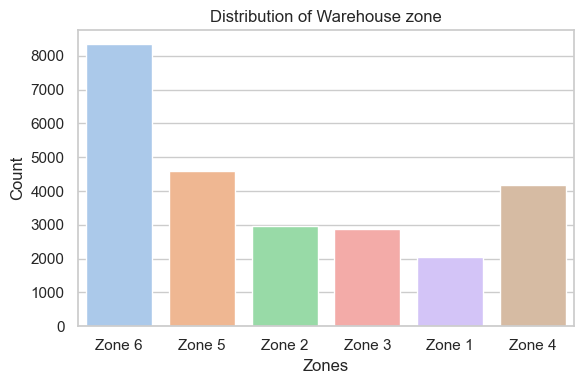

In [23]:
# Set style
sns.set(style="whitegrid")

# Plot from Series directly
plt.figure(figsize=(6, 4))
sns.countplot(x=data['WH_regional_zone'], palette='pastel')

plt.title("Distribution of Warehouse zone")
plt.xlabel("Zones")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

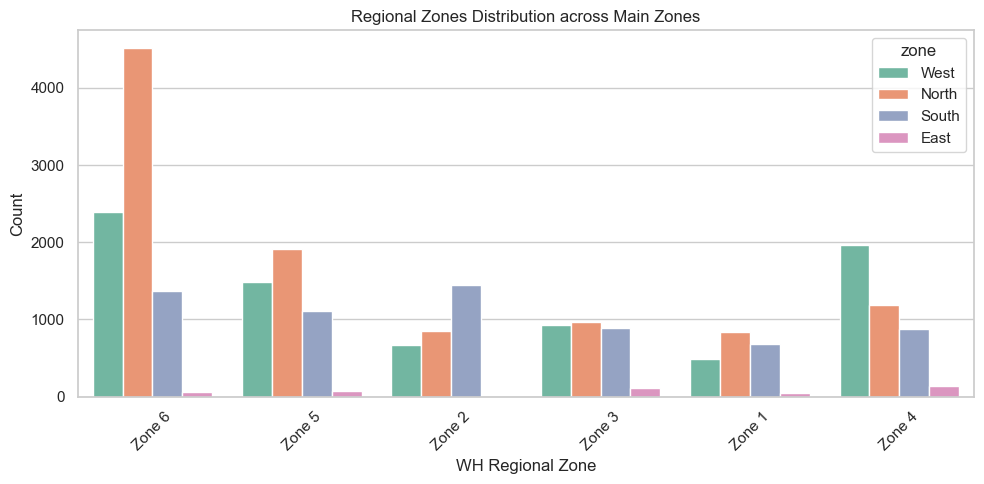

In [24]:
sns.set(style="whitegrid")

# Plot: Grouped bar chart of WH_regional_zone split by zone
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='WH_regional_zone', hue='zone', palette='Set2')

plt.title("Regional Zones Distribution across Main Zones")
plt.xlabel("WH Regional Zone")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
print(data['WH_capacity_size'].value_counts())

WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64


In [31]:
print(data['wh_owner_type'].value_counts())

wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64


In [32]:
print(data['approved_wh_govt_certificate'].value_counts())

approved_wh_govt_certificate
C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64


<Axes: xlabel='WH_capacity_size', ylabel='count'>

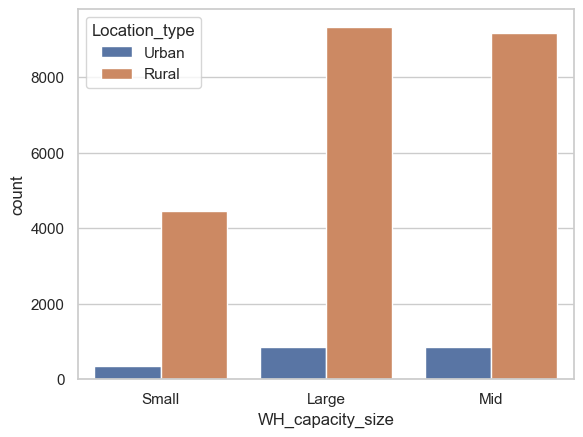

In [35]:
sns.countplot(data=data, x='WH_capacity_size', hue='Location_type')


  1. Rural Dominates Across All Sizes
Rural warehouses far outnumber Urban warehouses for all capacity sizes.

Especially in Large and Mid categories, rural counts are close to 9,000 each.

✅ 2. Small Warehouses are least common overall
Even in rural areas, Small warehouses are fewer than Mid and Large.

In urban areas, small warehouses are slightly more common than mid/large — but numbers are still very low compared to rural.

✅ 3. Urban Warehouses Are Rare
Urban warehouses barely reach 1,000–1,500 in any category.

Suggests limited urban infrastructure or preference for rural distribution.

<Axes: xlabel='zone', ylabel='num_refill_req_l3m'>

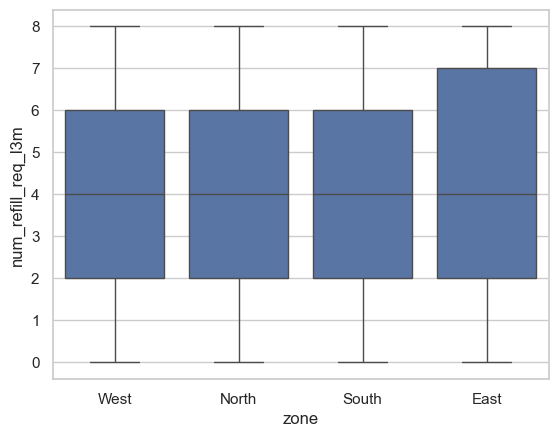

In [42]:
sns.boxplot(data=data, x='zone', y='num_refill_req_l3m')


Zone	Insights
West, North, South	All have similar distributions:
– Median ≈ 4
– Interquartile range (IQR): 2 to 6
– Min = 0, Max = 8
– Some outliers exist but not extreme


East	Has a wider spread:
– Still median ≈ 4
– More values in upper range (7–8)
– Suggests higher variability in refill demand
– May have some warehouses with very high refill needs

In [43]:
zone_summary = data.groupby('zone')[['num_refill_req_l3m', 'product_wg_ton']].mean().reset_index()
print(zone_summary)


    zone  num_refill_req_l3m  product_wg_ton
0   East            4.072261    22721.452214
1  North            4.068301    22199.437926
2  South            4.075291    21933.495913
3   West            4.127853    22079.384189


So, the East zone actually has very few warehouses across all its regional zones — like barely present compared to others.

But here's the twist... even with that tiny presence, it's showing higher refill requests every 3 months.

🤔 Why?

That probably means the few warehouses that do exist in the East are overloaded. They’re handling more demand than they’re built for, so they keep running low on inventory and need frequent refills.

Basically, supply isn't matching demand, and that’s putting pressure on a small number of facilities to serve a large area. It’s like having just 2 shops trying to serve an entire city — of course they’ll keep running out!

We should definitely look into adding more capacity in the East zone or redistributing the load more efficiently.

<Axes: xlabel='retail_shop_num', ylabel='product_wg_ton'>

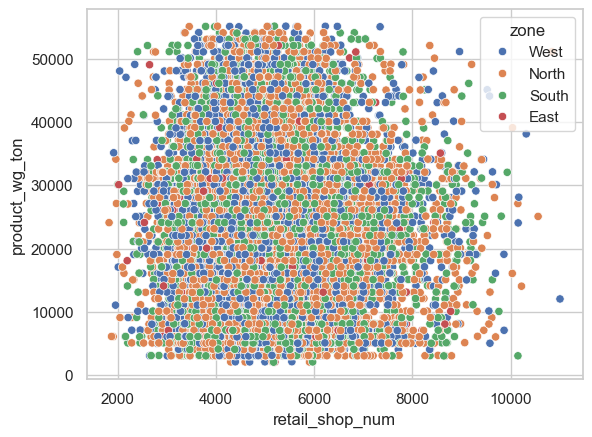

In [47]:
sns.scatterplot(data=data, x='retail_shop_num', y='product_wg_ton', hue='zone')


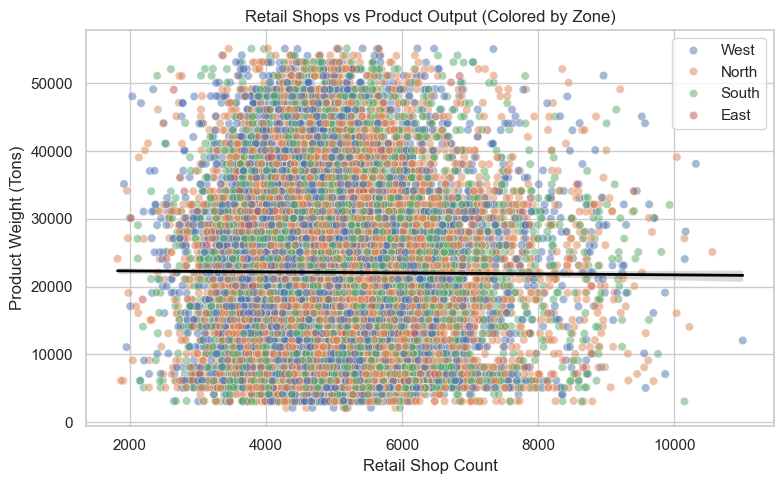

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='retail_shop_num', y='product_wg_ton', hue='zone', alpha=0.5)

# Add regression line (no hue to avoid overlap)
sns.regplot(data=data, x='retail_shop_num', y='product_wg_ton',
            scatter=False, color='black', line_kws={'linewidth': 2, 'label': 'Trend Line'})

plt.title("Retail Shops vs Product Output (Colored by Zone)")
plt.xlabel("Retail Shop Count")
plt.ylabel("Product Weight (Tons)")
plt.legend()
plt.tight_layout()
plt.show()


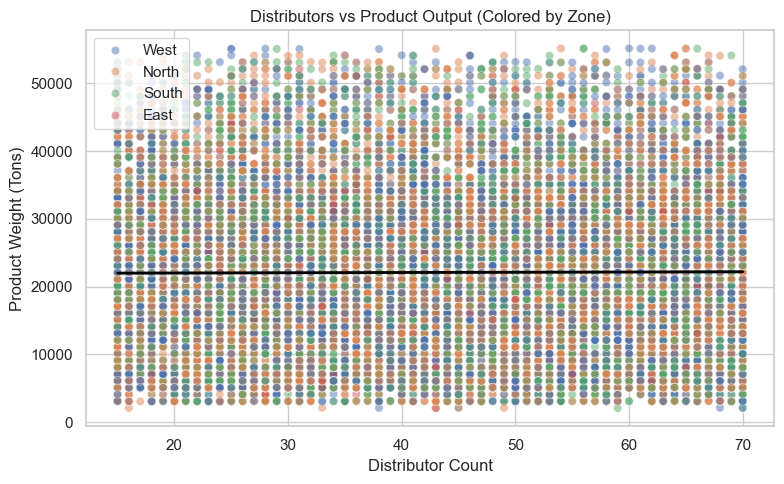

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='distributor_num', y='product_wg_ton', hue='zone', alpha=0.5)

# Add regression line (overall trend, not split by zone)
sns.regplot(data=data, x='distributor_num', y='product_wg_ton',
            scatter=False, color='black', line_kws={'linewidth': 2, 'label': 'Trend Line'})

plt.title("Distributors vs Product Output (Colored by Zone)")
plt.xlabel("Distributor Count")
plt.ylabel("Product Weight (Tons)")
plt.legend()
plt.tight_layout()
plt.show()


Conclusion from Scatter Plot Analysis

. Retail Shops vs Product Output (product_wg_ton)
The scatter plot shows that warehouses serving a higher number of retail shops tend to handle more product. However, the trend is not strongly linear — the regression line is nearly flat, indicating a weak overall correlation.

. Distributors vs Product Output
Similarly, the number of distributors connected to a warehouse does not significantly influence the product weight handled. Product volume varies widely across all distributor counts.

. Zone-wise Trends
All zones (West, North, South, East) are fairly evenly distributed across the charts, showing that zone is not a major differentiator in the relationship between these features and output.

<Axes: >

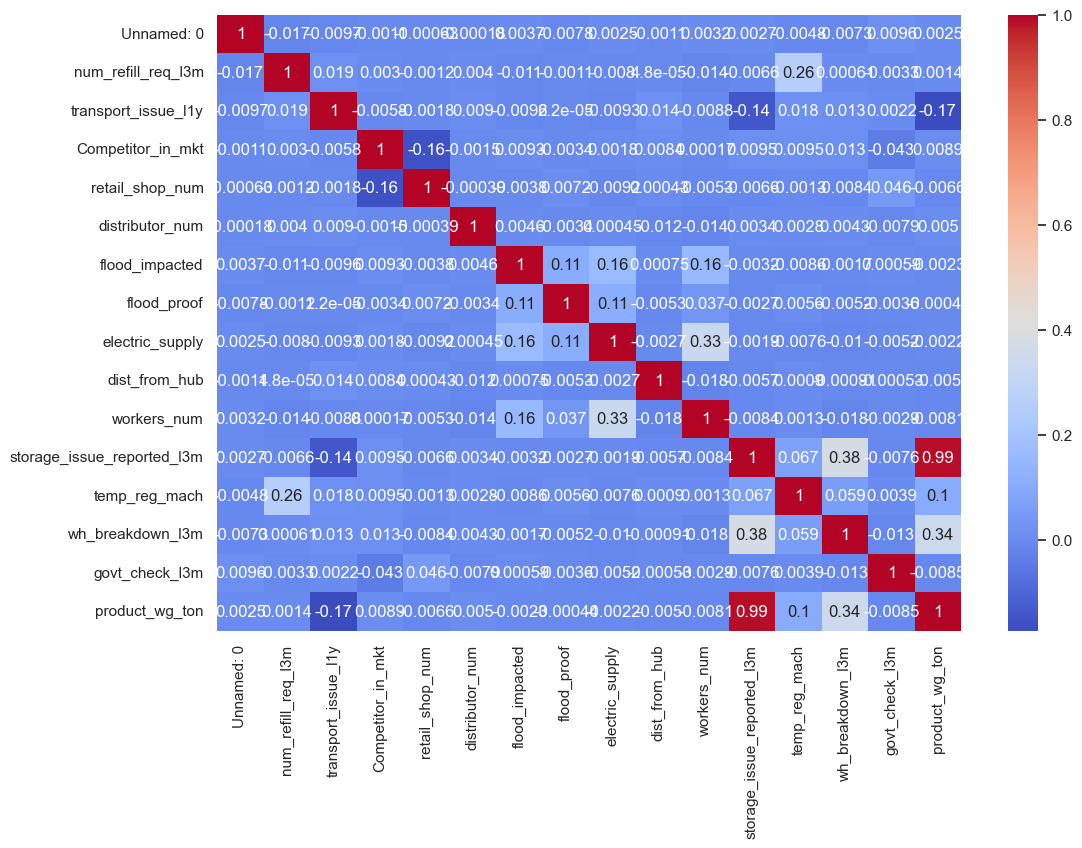

In [52]:

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')


| Feature Pair                                    | Correlation  | Interpretation                                                                                                        |
| ----------------------------------------------- | ------------ | --------------------------------------------------------------------------------------------------------------------- |
| `product_wg_ton` ↔ `storage_issue_reported_l3m` | **0.99** ✅   | Very strong positive correlation — warehouses handling more product have more storage issues (likely capacity stress) |
| `product_wg_ton` ↔ `workers_num`                | **0.34** 🟡  | Moderate positive correlation — more workers means more product handled                                               |
| `product_wg_ton` ↔ `retail_shop_num`            | **0.005** 🔵 | Very weak — serving more shops doesn’t strongly affect product tonnage                                                |
| `product_wg_ton` ↔ `distributor_num`            | **0.008** 🔵 | Also very weak — no major impact on output                                                                            |
| `product_wg_ton` ↔ `transport_issue_l1y`        | **-0.17** 🔻 | Slight negative correlation — transport issues may reduce product movement efficiency                                 |


<Axes: xlabel='WH_regional_zone', ylabel='count'>

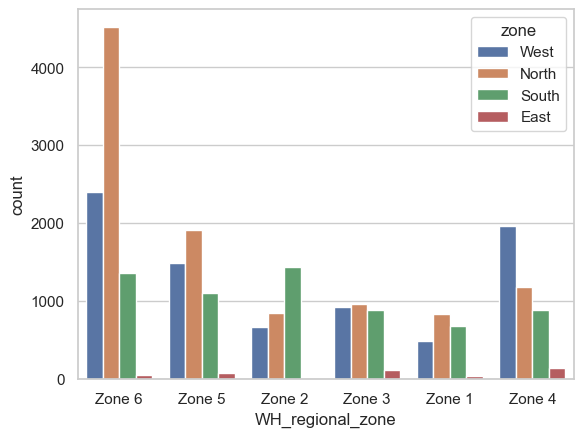

In [55]:
sns.countplot(data=data, x='WH_regional_zone', hue='zone')


In [63]:
pd.crosstab(data['WH_capacity_size'], data['zone'])


zone,East,North,South,West
WH_capacity_size,,,,
Large,74,5490,1615,2990
Mid,254,3001,3211,3554
Small,101,1787,1536,1387


The distribution of warehouse sizes across zones shows clear regional infrastructure differences.

1. North is heavy-duty (large warehouses dominate)

2. South and West use more mid-sized capacity

3. East is underdeveloped — mostly mid and small warehouses, suggesting limited scalability

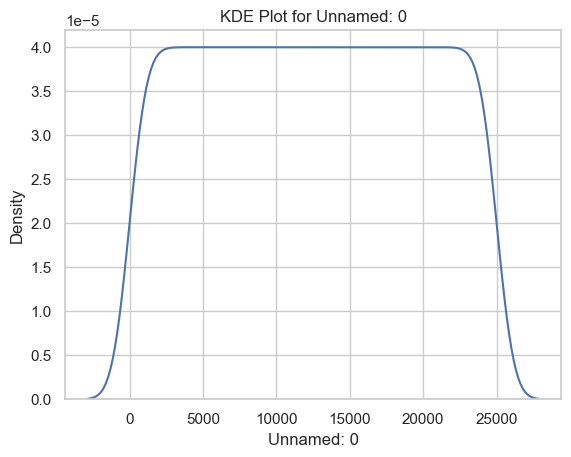

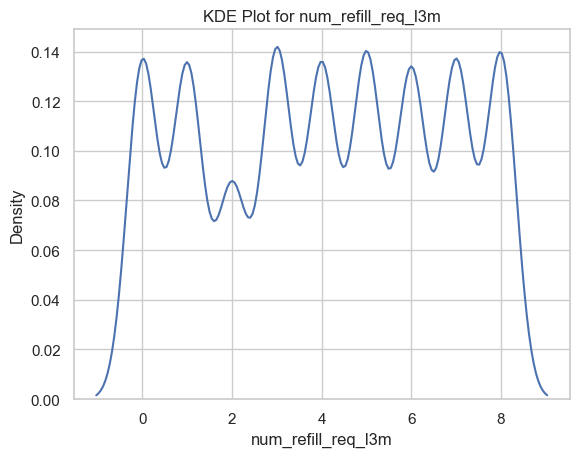

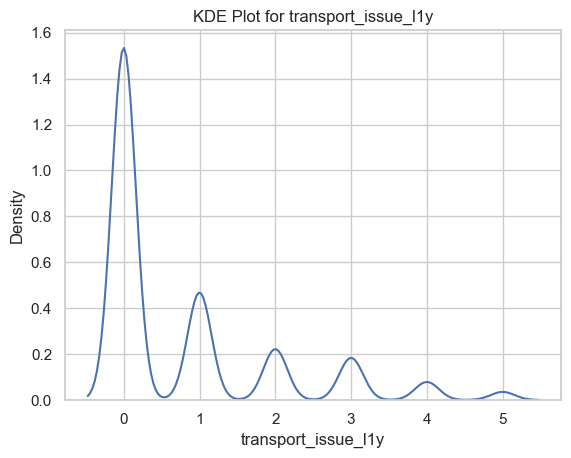

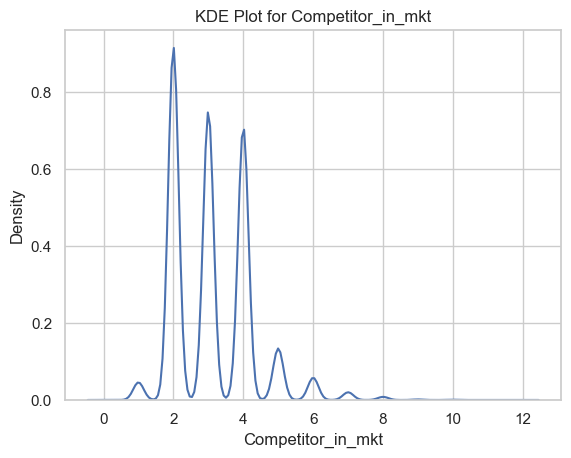

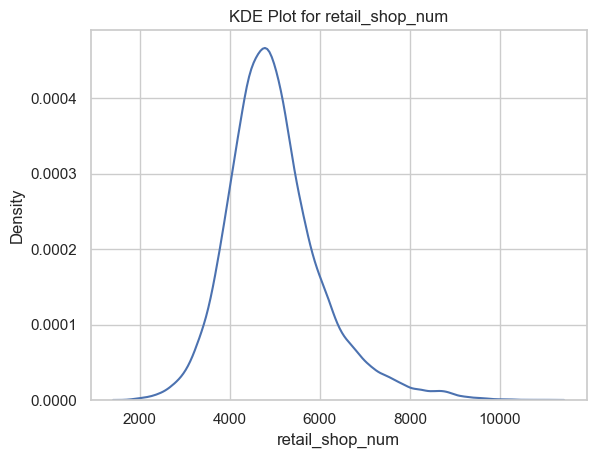

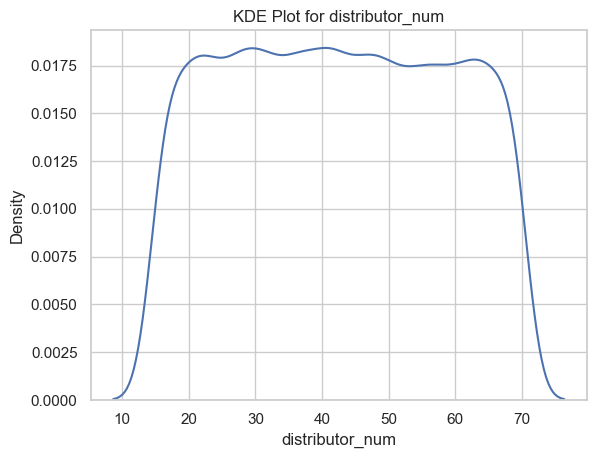

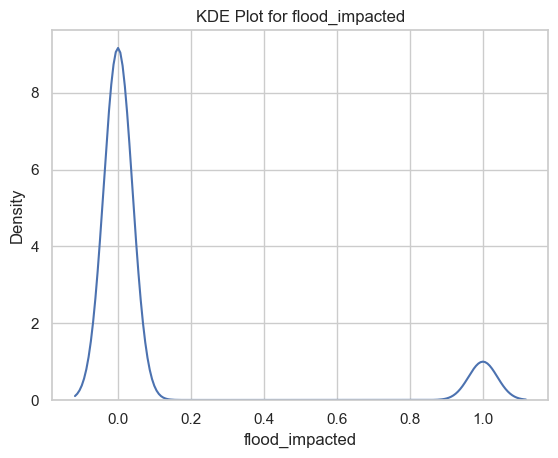

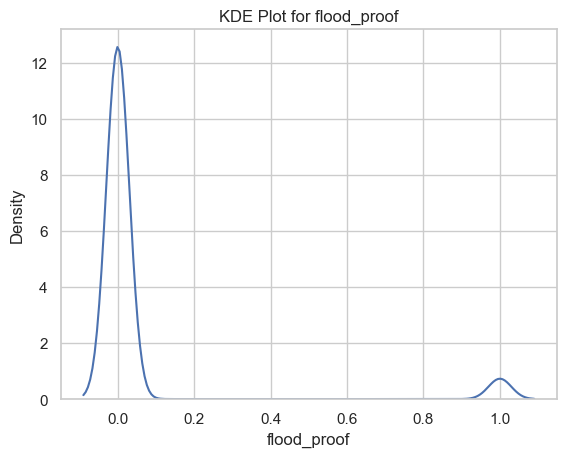

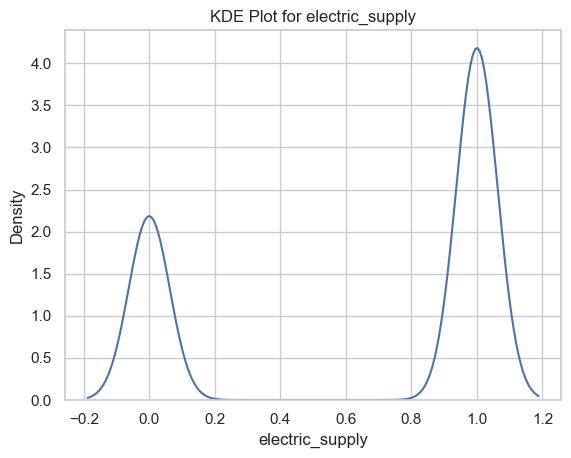

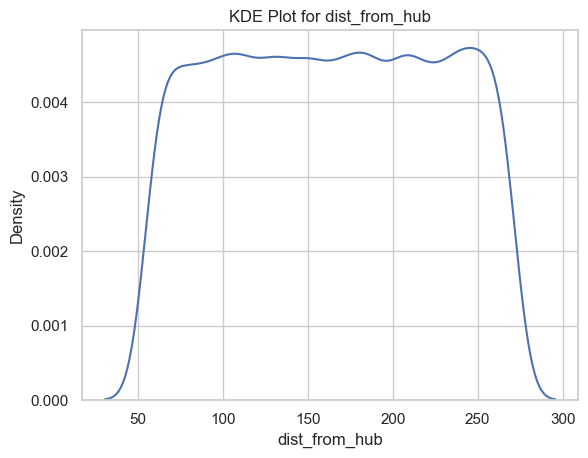

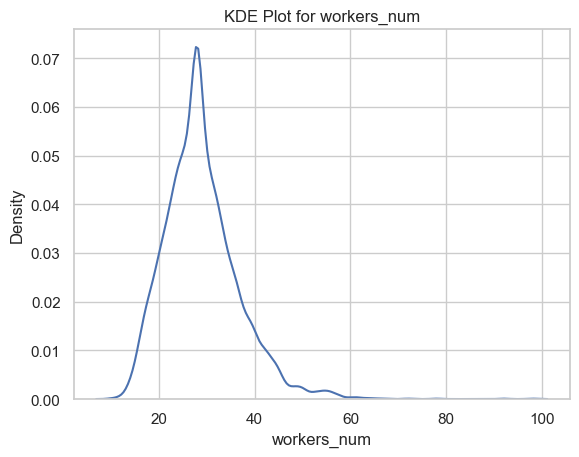

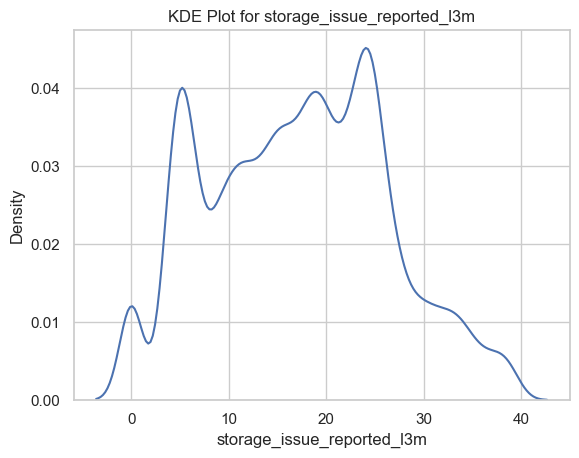

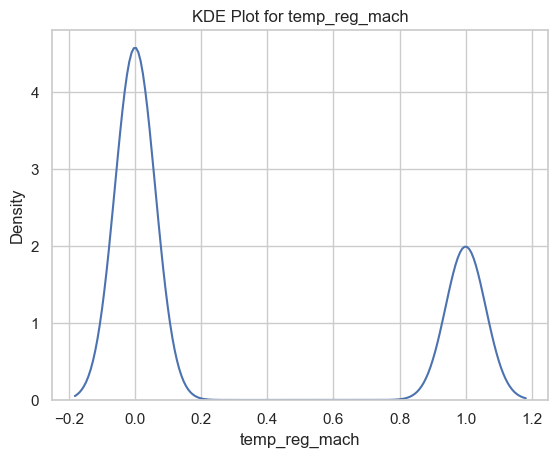

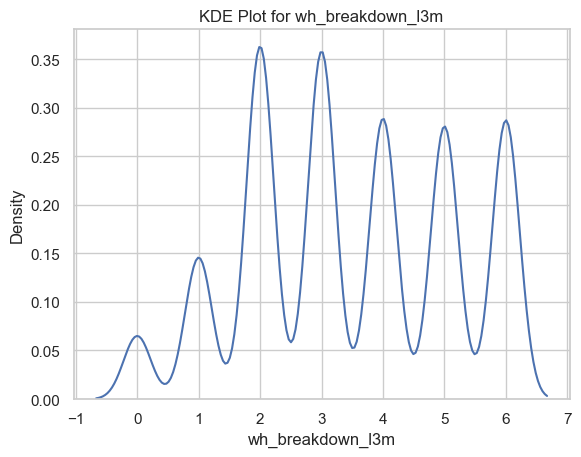

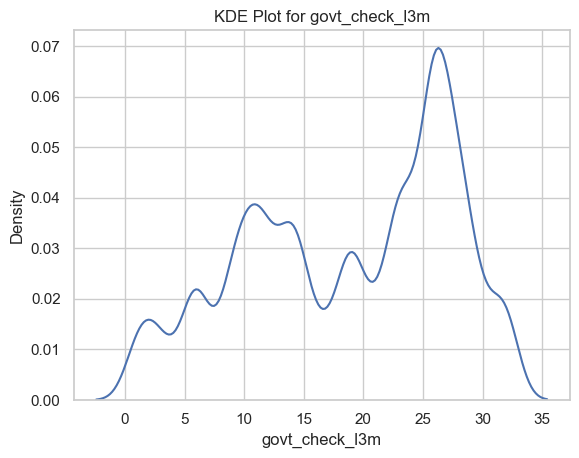

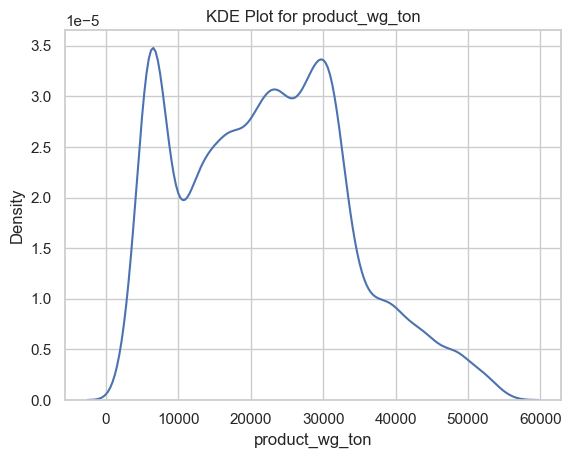

In [67]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    sns.kdeplot(data=data, x=col)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

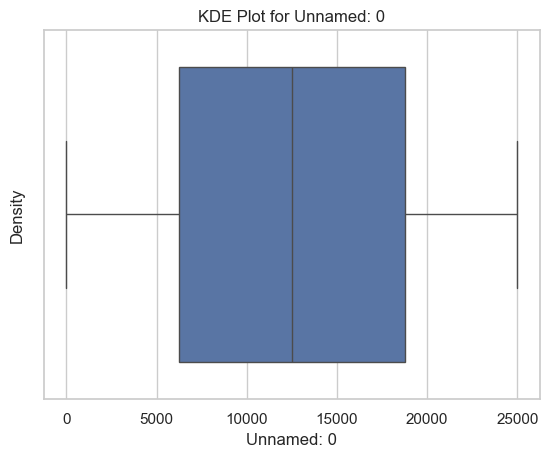

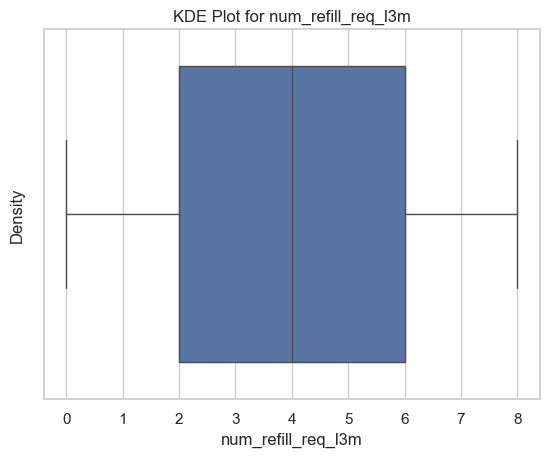

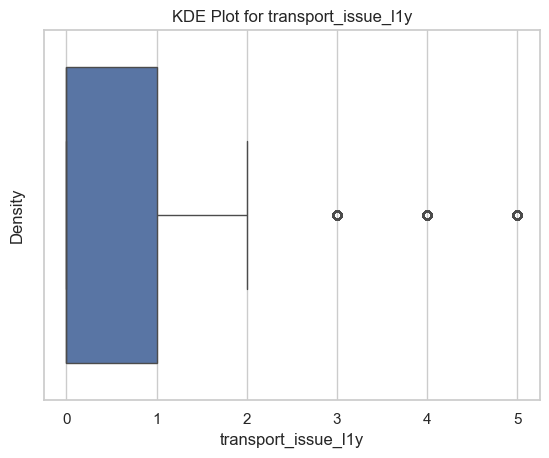

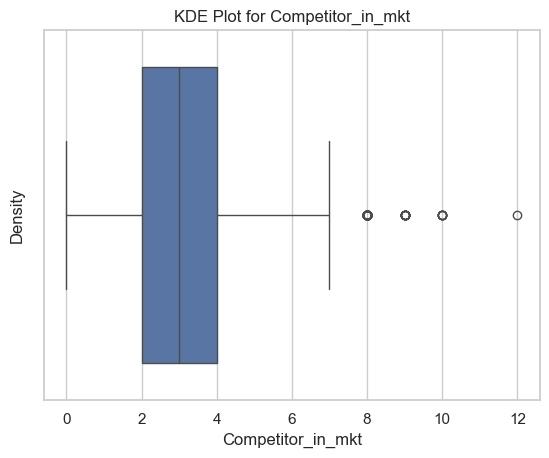

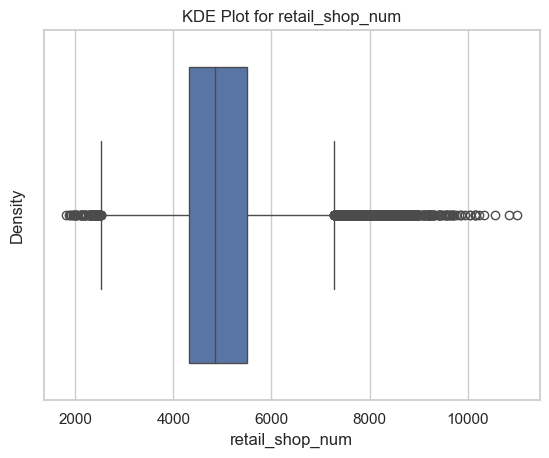

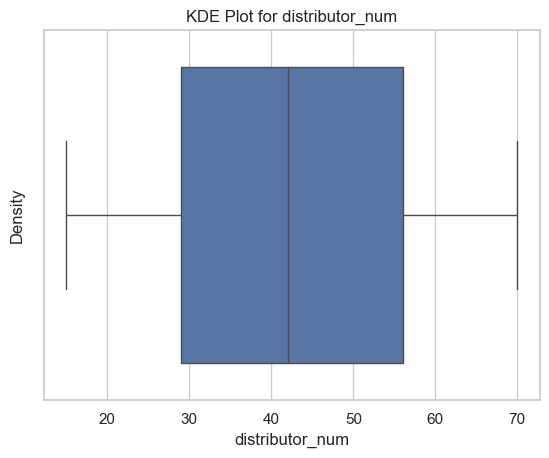

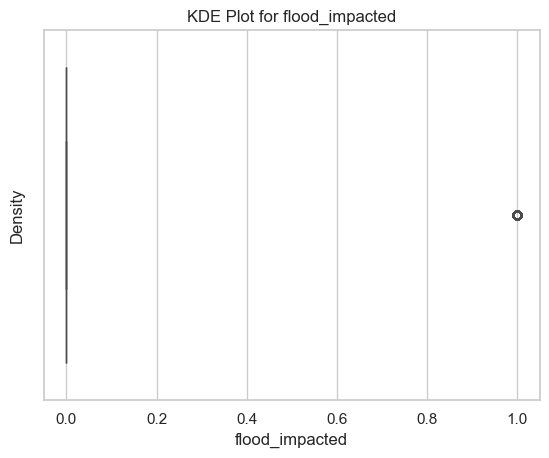

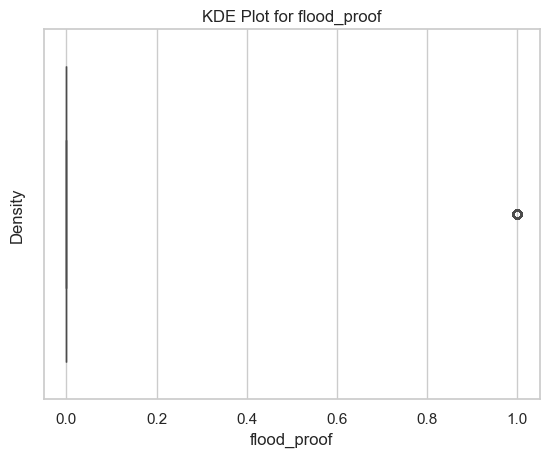

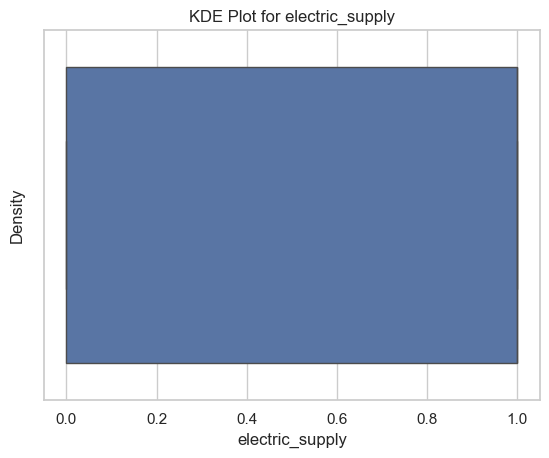

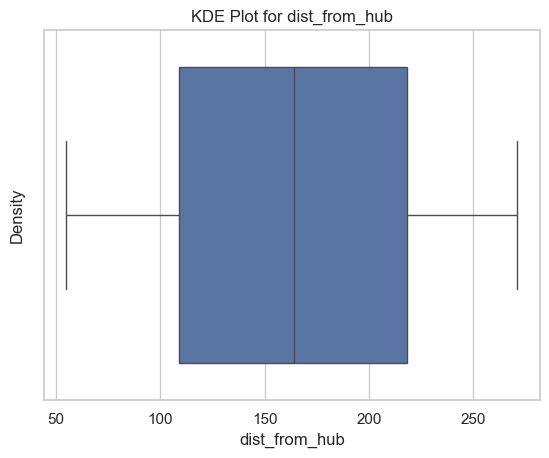

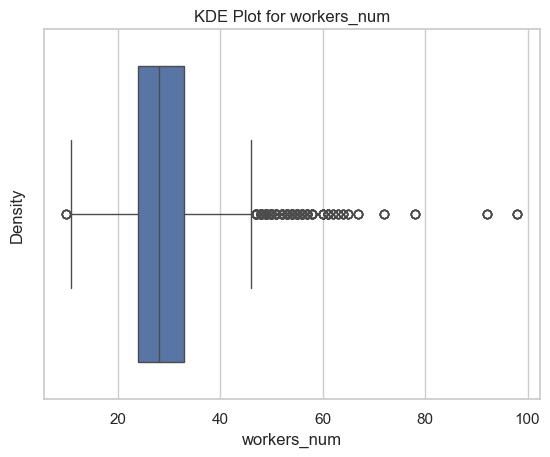

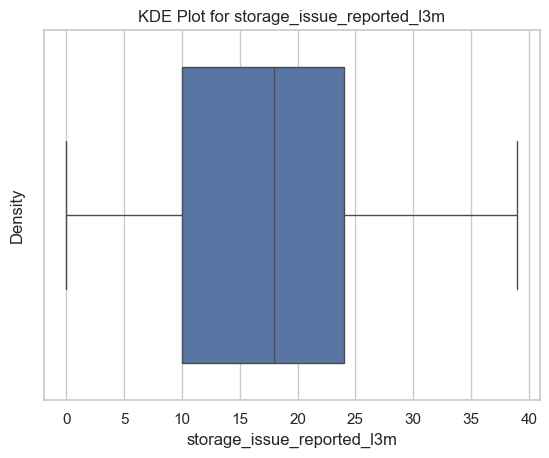

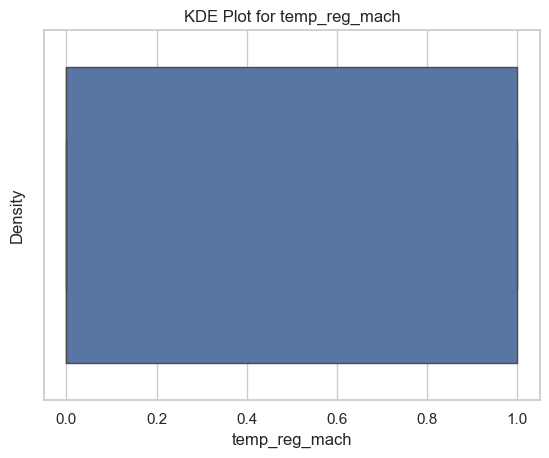

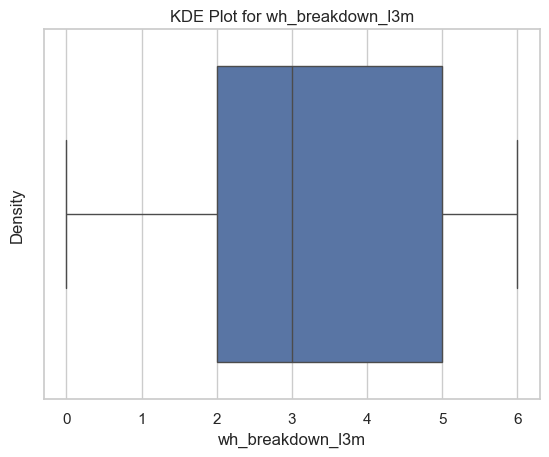

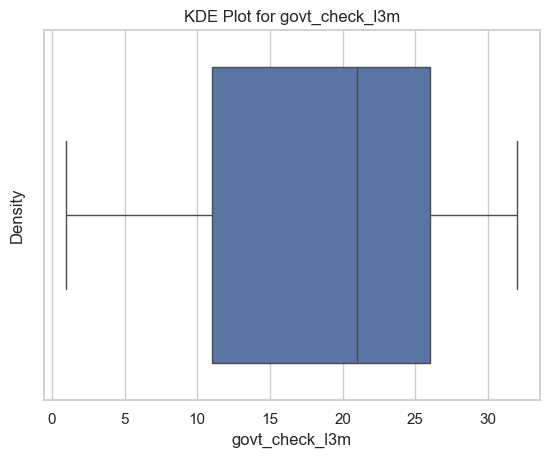

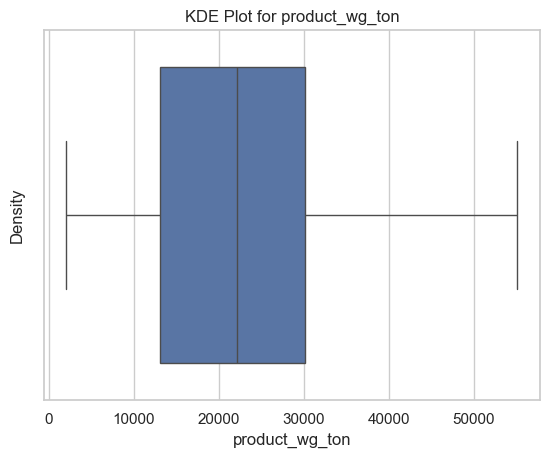

In [65]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    sns.boxplot(data=data, x=col)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()